# 3D Cube Visualization of Sales Data

# 3D Visualization of Sales Revenue by Store and Product Category

# Preprocessing

In [24]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_data = pd.read_csv("sales_data.csv")
sales_data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230,1
1,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312,2
2,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695,3
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671,4
4,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310,5


In [4]:
sales_data.set_index('transaction_id', inplace=True)
sales_data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price
transaction_id,,,,,,,
1,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230
2,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312
3,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695
4,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671
5,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310


In [5]:
sales_data['amount'].fillna(sales_data['amount'].mean(), inplace=True)
sales_data['single_price'].fillna(sales_data['single_price'].mean(), inplace=True)
sales_data['product_category'].fillna(sales_data['product_category'].mode()[0], inplace=True)
sales_data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price
transaction_id,,,,,,,
1,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230
2,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312
3,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695
4,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671
5,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310


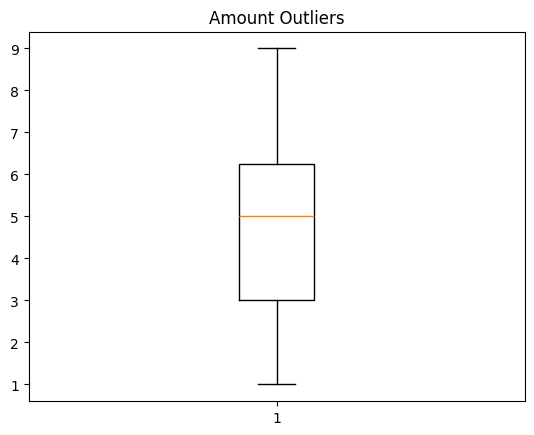

In [6]:
plt.boxplot(sales_data['amount'])
plt.title('Amount Outliers')
plt.show()

q1 = sales_data['amount'].quantile(0.25)
q3 = sales_data['amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
sales_data['amount'] = sales_data['amount'].clip(lower_bound, upper_bound)


In [7]:
sales_data.drop(['customer_id', 'store_id'], axis=1, inplace=True)
sales_data.head()

,product_id,product_category,date,amount,single_price
transaction_id,,,,,
1,53642,Toys,4/1/2007 8:09,3,90.246230
2,90945,Movies,2/15/2005 10:47,2,60.586312
3,18548,Movies,9/27/2007 5:38,5,96.612695
4,85359,Books,5/7/2005 13:19,5,16.962671
5,80069,Clothing,1/6/2008 17:36,5,65.215310


In [9]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['day'] = sales_data['date'].dt.day

sales_data['total_price'] = sales_data['amount'] * sales_data['single_price']
sales_data.head()

,product_id,product_category,date,amount,single_price,year,month,day,total_price
transaction_id,,,,,,,,,
1,53642,Toys,2007-04-01 08:09:00,3,90.246230,2007,4,1,270.738691
2,90945,Movies,2005-02-15 10:47:00,2,60.586312,2005,2,15,121.172625
3,18548,Movies,2007-09-27 05:38:00,5,96.612695,2007,9,27,483.063475
4,85359,Books,2005-05-07 13:19:00,5,16.962671,2005,5,7,84.813354
5,80069,Clothing,2008-01-06 17:36:00,5,65.215310,2008,1,6,326.076552


In [10]:
max_amount = sales_data['amount'].max()
print("Max amount:", max_amount)
if max_amount <= 9:
    bins = [0, 3, 6, max_amount] 
    labels = [0, 1, 2] 
else:
    bins = [0, 50, 150, max_amount]
    labels = [0, 1, 2]
sales_data['amount_category'] = pd.cut(sales_data['amount'], bins=bins, labels=labels)
sales_data.head()



Max amount: 9


,product_id,product_category,date,amount,single_price,year,month,day,total_price,amount_category
transaction_id,,,,,,,,,,
1,53642,Toys,2007-04-01 08:09:00,3,90.246230,2007,4,1,270.738691,0
2,90945,Movies,2005-02-15 10:47:00,2,60.586312,2005,2,15,121.172625,0
3,18548,Movies,2007-09-27 05:38:00,5,96.612695,2007,9,27,483.063475,1
4,85359,Books,2005-05-07 13:19:00,5,16.962671,2005,5,7,84.813354,1
5,80069,Clothing,2008-01-06 17:36:00,5,65.215310,2008,1,6,326.076552,1


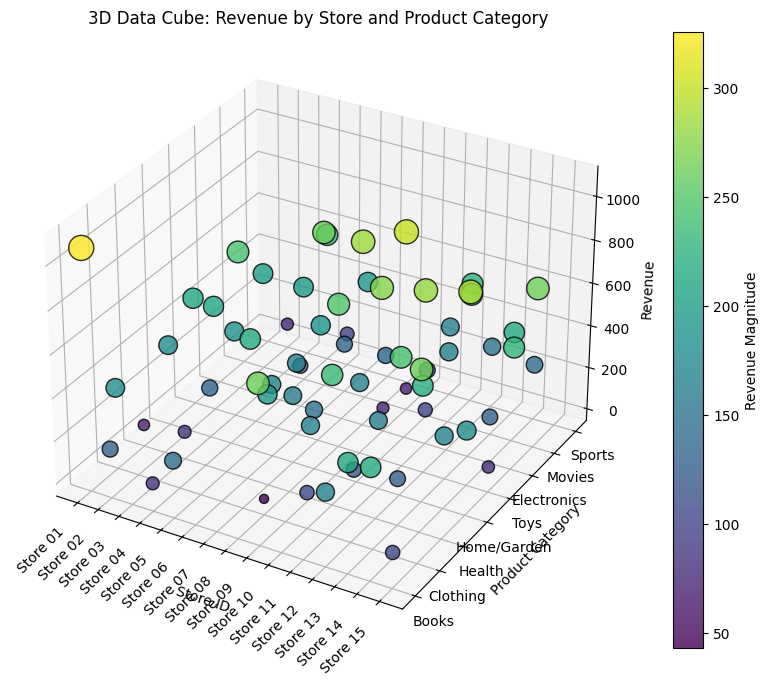

In [33]:
def load_and_process_data(sales_data):
    sales_data = pd.read_csv("sales_data.csv")
    sales_data['revenue'] = sales_data['amount'] * sales_data['single_price']
    data_cube = sales_data.groupby(['store_id', 'product_category'])['revenue'].sum().reset_index()
    return data_cube
def visualize_data(data_cube):
    store_ids = data_cube['store_id'].unique()
    product_categories = data_cube['product_category'].unique()
    store_mapping = {store: idx for idx, store in enumerate(store_ids)}
    category_mapping = {category: idx for idx, category in enumerate(product_categories)}
    data_cube['store_idx'] = data_cube['store_id'].map(store_mapping)
    data_cube['category_idx'] = data_cube['product_category'].map(category_mapping)
    x = data_cube['store_idx']
    y = data_cube['category_idx']
    z = data_cube['revenue']
    sizes = np.sqrt(data_cube['revenue']) * 10  
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, s=sizes, c=sizes, cmap='viridis', alpha=0.8, edgecolors="k")
    ax.set_xlabel('Store ID')
    ax.set_ylabel('Product Category')
    ax.set_zlabel('Revenue')
    ax.set_xticks(range(len(store_ids)))
    ax.set_xticklabels(store_ids, rotation=45, ha='right')
    ax.set_yticks(range(len(product_categories)))
    ax.set_yticklabels(product_categories)
    plt.colorbar(scatter, ax=ax, label='Revenue Magnitude')
    plt.title("3D Data Cube: Revenue by Store and Product Category")
    plt.show()
file_path = 'sales_data.csv' 
data_cube = load_and_process_data(file_path)
visualize_data(data_cube)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sales_data[['amount', 'single_price', 'total_price']] = scaler.fit_transform(sales_data[['amount', 'single_price', 'total_price']])
sales_data.head()

,product_id,product_category,date,amount,single_price,year,month,day,total_price,amount_category
transaction_id,,,,,,,,,,
1,53642,Toys,2007-04-01 08:09:00,-0.660504,1.349201,2007,4,1,0.120787,0
2,90945,Movies,2005-02-15 10:47:00,-1.068223,0.193748,2005,2,15,-0.711990,0
3,18548,Movies,2007-09-27 05:38:00,0.154933,1.597218,2007,9,27,1.303002,1
4,85359,Books,2005-05-07 13:19:00,0.154933,-1.505686,2005,5,7,-0.914437,1
5,80069,Clothing,2008-01-06 17:36:00,0.154933,0.374079,2008,1,6,0.428906,1


In [12]:
sales_data.dtypes

product_id                   int64
product_category            object
date                datetime64[ns]
amount                     float64
single_price               float64
year                         int32
month                        int32
day                          int32
total_price                float64
amount_category           category
dtype: object

In [13]:
sales_data.head()

,product_id,product_category,date,amount,single_price,year,month,day,total_price,amount_category
transaction_id,,,,,,,,,,
1,53642,Toys,2007-04-01 08:09:00,-0.660504,1.349201,2007,4,1,0.120787,0
2,90945,Movies,2005-02-15 10:47:00,-1.068223,0.193748,2005,2,15,-0.711990,0
3,18548,Movies,2007-09-27 05:38:00,0.154933,1.597218,2007,9,27,1.303002,1
4,85359,Books,2005-05-07 13:19:00,0.154933,-1.505686,2005,5,7,-0.914437,1
5,80069,Clothing,2008-01-06 17:36:00,0.154933,0.374079,2008,1,6,0.428906,1


In [14]:
sales_data = pd.get_dummies(sales_data, columns=['product_category'], drop_first=True)
sales_data = sales_data.replace({True: 1, False: 2})
sales_data.head()

,product_id,date,amount,single_price,year,month,day,total_price,amount_category,product_category_Clothing,product_category_Electronics,product_category_Health,product_category_Home/Garden,product_category_Movies,product_category_Sports,product_category_Toys
transaction_id,,,,,,,,,,,,,,,,
1,53642,2007-04-01 08:09:00,-0.660504,1.349201,2007,4,1,0.120787,0,2,2,2,2,2,2,1
2,90945,2005-02-15 10:47:00,-1.068223,0.193748,2005,2,15,-0.711990,0,2,2,2,2,1,2,2
3,18548,2007-09-27 05:38:00,0.154933,1.597218,2007,9,27,1.303002,1,2,2,2,2,1,2,2
4,85359,2005-05-07 13:19:00,0.154933,-1.505686,2005,5,7,-0.914437,1,2,2,2,2,2,2,2
5,80069,2008-01-06 17:36:00,0.154933,0.374079,2008,1,6,0.428906,1,1,2,2,2,2,2,2


In [15]:
print(sales_data.columns)


Index(['product_id', 'date', 'amount', 'single_price', 'year', 'month', 'day',
       'total_price', 'amount_category', 'product_category_Clothing',
       'product_category_Electronics', 'product_category_Health',
       'product_category_Home/Garden', 'product_category_Movies',
       'product_category_Sports', 'product_category_Toys'],
      dtype='object')


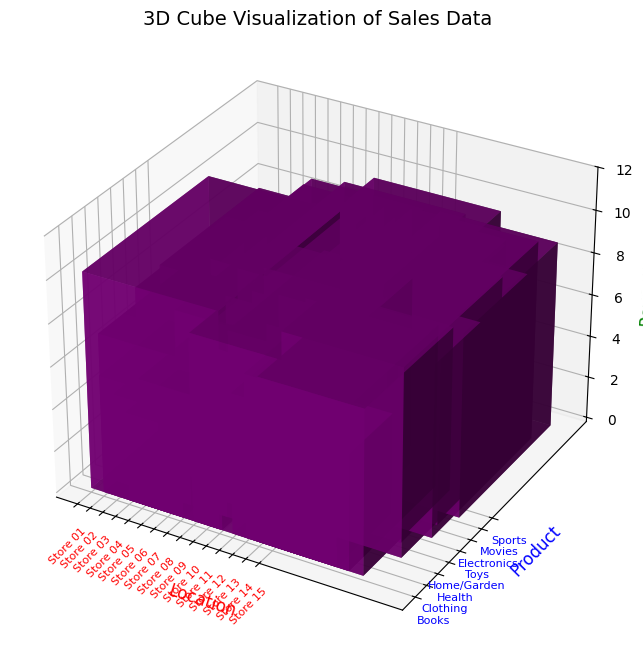

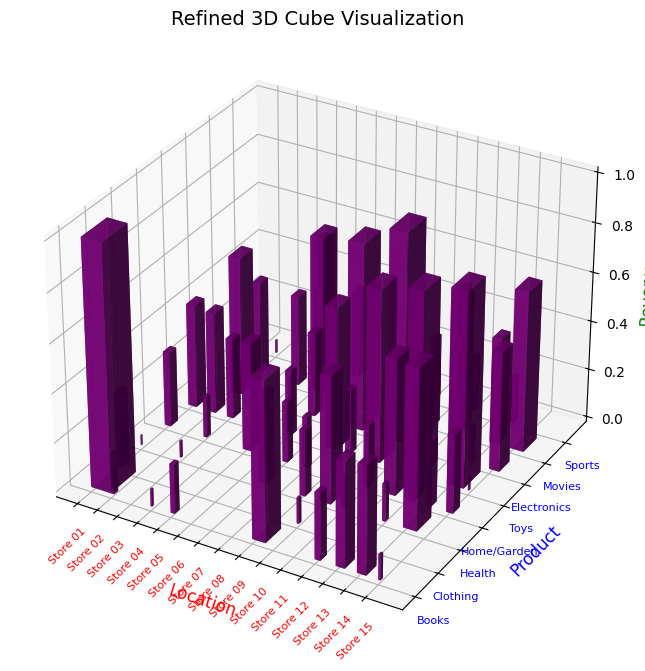

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
sales_data = pd.read_csv("sales_data.csv")
sales_data['revenue'] = sales_data['amount'] * sales_data['single_price']
agg_data = sales_data.groupby(['store_id', 'product_category']).agg({'revenue': 'sum'}).reset_index()
store_mapping = {store: idx for idx, store in enumerate(agg_data['store_id'].unique())}
product_mapping = {product: idx for idx, product in enumerate(agg_data['product_category'].unique())}
agg_data['store_numeric'] = agg_data['store_id'].map(store_mapping)
agg_data['product_numeric'] = agg_data['product_category'].map(product_mapping)
x = agg_data['store_numeric']
y = agg_data['product_numeric']
z = np.zeros_like(agg_data['revenue'])
dx = dy = dz = np.cbrt(agg_data['revenue'])  
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color='purple', alpha=0.8)
ax.set_xticks(list(store_mapping.values()))
ax.set_xticklabels(list(store_mapping.keys()), rotation=45, fontsize=8, color='red')
ax.set_yticks(list(product_mapping.values()))
ax.set_yticklabels(list(product_mapping.keys()), fontsize=8, color='blue')
ax.set_zticks(np.arange(0, dz.max() + 2, step=2))
ax.set_zlabel('Revenue', fontsize=10, color='green')
ax.set_xlabel('Location', fontsize=12, color='red')
ax.set_ylabel('Product', fontsize=12, color='blue')
ax.set_zlabel('Revenue', fontsize=12, color='green')
ax.set_title('3D Cube Visualization of Sales Data', fontsize=14)
plt.show()
agg_data['cube_size'] = agg_data['revenue'] / agg_data['revenue'].max()
x = agg_data['store_numeric']
y = agg_data['product_numeric']
z = np.zeros_like(agg_data['cube_size'])  
dx = dy = dz = agg_data['cube_size']  
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color='purple', alpha=0.8)
ax.set_xticks(list(store_mapping.values()))
ax.set_xticklabels(list(store_mapping.keys()), rotation=45, fontsize=8, color='red')
ax.set_yticks(list(product_mapping.values()))
ax.set_yticklabels(list(product_mapping.keys()), fontsize=8, color='blue')
ax.set_zlabel('Revenue', fontsize=10, color='green')
ax.set_xlabel('Location', fontsize=12, color='red')
ax.set_ylabel('Product', fontsize=12, color='blue')
ax.set_zlabel('Revenue', fontsize=12, color='green')
ax.set_title('Refined 3D Cube Visualization', fontsize=14)
plt.show()


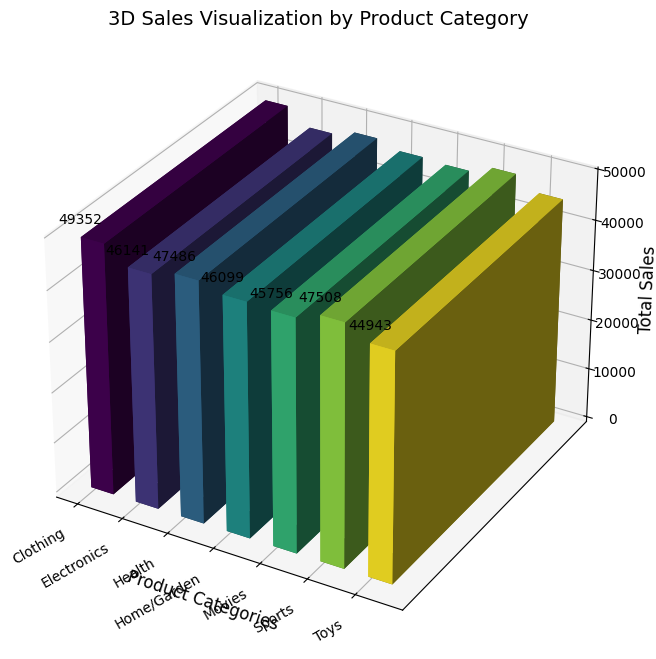

In [32]:
def load_and_process_data(sales_data):
    sales_data = pd.get_dummies(sales_data, columns=['product_category'], drop_first=True)
    sales_data = sales_data.replace({True: 1, False: 2})
    sales_data['date'] = pd.to_datetime(sales_data['date'])
    sales_data['year'] = sales_data['date'].dt.year
    sales_data['month'] = sales_data['date'].dt.month
    sales_data['day'] = sales_data['date'].dt.day
    sales_data['total_price'] = sales_data['amount'] * sales_data['single_price']
    return sales_data
def visualize_data_bar_chart(sales_data):
    sales_data['Clothing_sales'] = sales_data['product_category_Clothing'] * sales_data['total_price']
    sales_data['Electronics_sales'] = sales_data['product_category_Electronics'] * sales_data['total_price']
    sales_data['Health_sales'] = sales_data['product_category_Health'] * sales_data['total_price']
    sales_data['Home/Garden_sales'] = sales_data['product_category_Home/Garden'] * sales_data['total_price']
    sales_data['Movies_sales'] = sales_data['product_category_Movies'] * sales_data['total_price']
    sales_data['Sports_sales'] = sales_data['product_category_Sports'] * sales_data['total_price']
    sales_data['Toys_sales'] = sales_data['product_category_Toys'] * sales_data['total_price']
    total_sales_by_category = {
        'Clothing': sales_data['Clothing_sales'].sum(),
        'Electronics': sales_data['Electronics_sales'].sum(),
        'Health': sales_data['Health_sales'].sum(),
        'Home/Garden': sales_data['Home/Garden_sales'].sum(),
        'Movies': sales_data['Movies_sales'].sum(),
        'Sports': sales_data['Sports_sales'].sum(),
        'Toys': sales_data['Toys_sales'].sum(),
    }
    cube_data = np.array(list(total_sales_by_category.values()))
    categories = list(total_sales_by_category.keys())
    colors = plt.cm.viridis(np.linspace(0, 1, len(categories))) 
    x = np.arange(len(categories))
    y = np.zeros_like(x)
    dx = dy = 0.5
    dz = cube_data
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.bar3d(x, y, np.zeros_like(x), dx, dy, dz, color=colors, shade=True)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=30, ha='right', fontsize=10)
    ax.set_yticks([])
    ax.set_xlabel('Product Categories', fontsize=12)
    ax.set_zlabel('Total Sales', fontsize=12)
    ax.set_title('3D Sales Visualization by Product Category', fontsize=14)
    for i in range(len(x)):
        ax.text(x[i], y[i], dz[i] + dz.max() * 0.05, f'{int(dz[i])}', color='black', ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()
sales_data = pd.read_csv("sales_data.csv") 
sales_data = load_and_process_data(sales_data)

visualize_data_bar_chart(sales_data)
